In [1]:
# # Unzipping the Data
# !unzip /content/drive/MyDrive/DS_DATA/skin_Care.zip -d /content/data_file

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import ast
import re
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings(action='ignore')

### Reading Datas

In [3]:
product_data=pd.read_csv("/content/data_file/product_info.csv")
review_data1=pd.read_csv("/content/data_file/reviews_0_250.csv")
review_data2=pd.read_csv("/content/data_file/reviews_250_500.csv")

### Display Data

In [4]:
product_df=pd.DataFrame(product_data)
df_clean=product_df.copy()

In [5]:
product_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
# Shape of DataFrame
product_df.shape

(8494, 27)

In [7]:
#Columns of Data
product_df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [8]:
#Datatype of columns
product_df.dtypes.reset_index().rename(columns={'index':'Column',0:'Datatype'})

,Column,Datatype
0,product_id,object
1,product_name,object
2,brand_id,int64
3,brand_name,object
4,loves_count,int64
5,rating,float64
6,reviews,float64
7,size,object
8,variation_type,object
9,variation_value,object


### Feature Engineering

In [9]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

Converting Size column in to categorical column

In [10]:
# Convert numeric values into custom-defined bins
def size_mapping(value):
  if  value< 11.0:
        return '1-10 ML'
  elif value >=11.0 and value<31.0:
      return '11-30 ML'
  elif value >=31.0 and value<51.0:
      return '31-50 ML'
  elif value >=50.0 and value<76.0:
      return '50-75 ML'
  elif value >=76.0 and value<101.0:
      return '75-100 ML'
  elif value >=101.0 and value<126.0:
      return '100-125 ML'
  elif value >=126.0 and value<175.0:
      return '125-175 ML'
  else:
      return 'Above 175 ML'

In [11]:
df_clean['size']=df_clean['size'].apply(lambda x: re.sub(r'/.*', '', x).replace("oz","").strip() if pd.notnull(x) else x).apply(lambda x: x.replace("fl","").strip() if pd.notnull(x) else x).apply(lambda x: x.replace("ml","").strip() if pd.notnull(x) else x).apply(lambda x: size_mapping(round(float(x)*29.573,2)) if pd.notnull(x) and is_float(x) else x)

In [12]:
#Drop Unwanted columns
df_clean.drop(['ingredients','variation_type','variation_value','variation_desc'],inplace=True,axis=1)

In [13]:
# df_clean=df_clean.melt(id_vars=['product_id','product_name'],value_vars=range(10))
# df_clean

### Null value count of column and Visualization

In [14]:
df_null=(df_clean.isnull().mean()*100).reset_index().rename(columns={'index':'Column',0:'Percentage'})
df_null

,Column,Percentage
0,product_id,0.000000
1,product_name,0.000000
2,brand_id,0.000000
3,brand_name,0.000000
4,loves_count,0.000000
5,rating,3.272899
6,reviews,3.272899
7,size,19.201789
8,price_usd,0.000000
9,value_price_usd,94.690370


<Axes: >

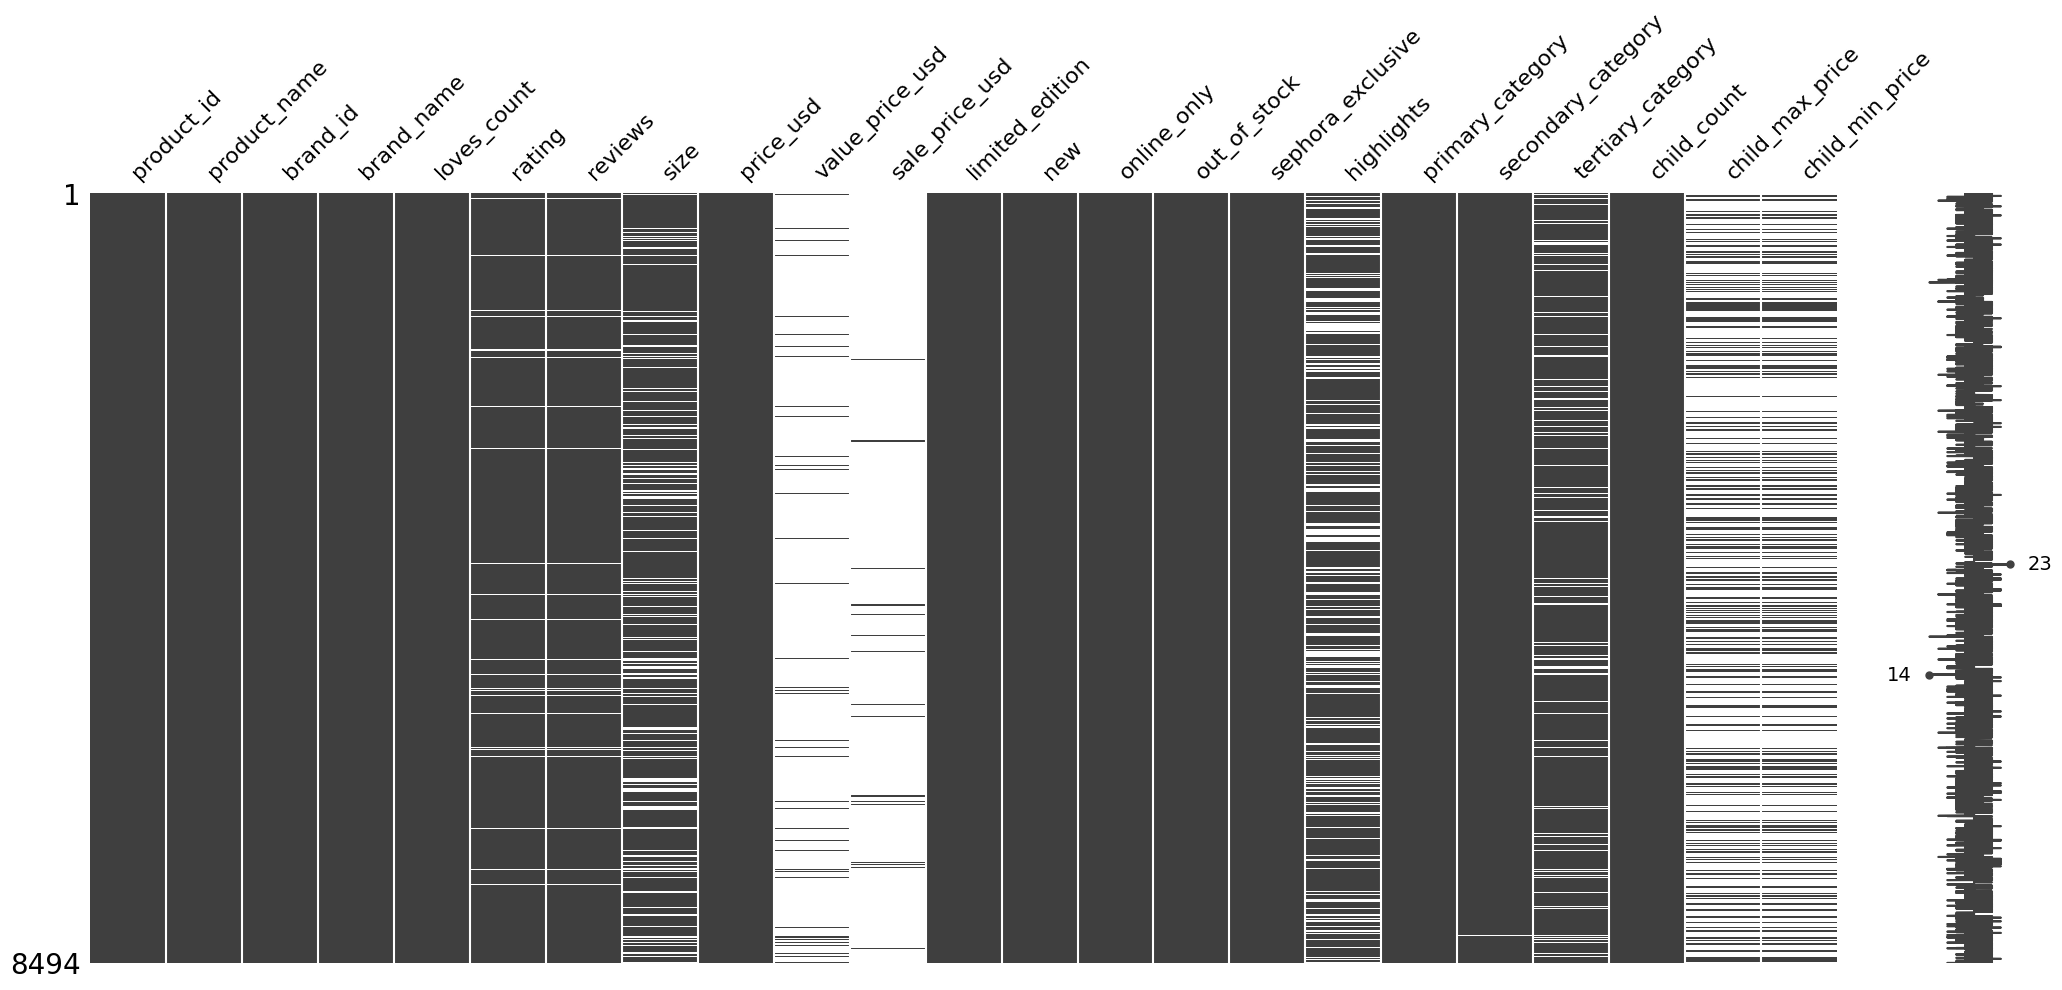

In [15]:
msno.matrix(df_clean)

Dropping Null value column above 65% of missing values

In [16]:
drop_col=df_null.loc[df_null['Percentage']>=65]['Column'].values
df_clean.drop(drop_col,axis=1,inplace=True)

In [17]:
impute_col=df_null.loc[(df_null['Percentage']>0)&(df_null['Percentage']<=65)]['Column'].values
impute_col

array(['rating', 'reviews', 'size', 'highlights', 'secondary_category',
       'tertiary_category'], dtype=object)

In [18]:
numeric_col=df_clean[impute_col].select_dtypes(include=['number']).columns.values
categoric_col=df_clean[impute_col].select_dtypes(exclude=['number']).columns.values

In [19]:
categoric_col

array(['size', 'highlights', 'secondary_category', 'tertiary_category'],
      dtype=object)

In [20]:
numeric_col

array(['rating', 'reviews'], dtype=object)

In [21]:
prod_imputat=df_clean.copy()

In [22]:
dt_impu=prod_imputat.drop(['product_name','brand_name','product_id','brand_id','highlights','tertiary_category','child_count'],axis=1)

In [23]:
dt_impu.head()

,loves_count,rating,reviews,size,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,6320,3.6364,11.0,NaN,35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,3827,4.1538,13.0,75-100 ML,195.0,0,0,1,0,0,Fragrance,Women
2,3253,4.2500,16.0,75-100 ML,195.0,0,0,1,0,0,Fragrance,Women
3,3018,4.4762,21.0,75-100 ML,195.0,0,0,1,0,0,Fragrance,Women
4,2691,3.2308,13.0,75-100 ML,195.0,0,0,1,0,0,Fragrance,Women


In [24]:
dt_impu.shape

(8494, 12)

###Data Cleaning

#### Imputing Null values using KNN Imputer

In [25]:
# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=3)
df=dt_impu.drop(['size','primary_category','secondary_category'],axis=1)
df_abc=dt_impu[['size','primary_category','secondary_category']]
# Perform k-NN imputation
imputed_data = imputer.fit_transform(df)

# Convert the imputed data array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
df_imputed=pd.concat([df_abc,imputed_df],axis=1)
df_imputed.head()

,size,primary_category,secondary_category,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive
0,NaN,Fragrance,Value & Gift Sets,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0
1,75-100 ML,Fragrance,Women,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0
2,75-100 ML,Fragrance,Women,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0
3,75-100 ML,Fragrance,Women,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0
4,75-100 ML,Fragrance,Women,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df_imputed.shape

(8494, 12)

In [27]:
index_analy=df_imputed.dropna(subset=['secondary_category']).index

In [28]:
df_imputed = df_imputed.dropna(subset=['secondary_category']).reset_index()
df_imputed.drop(['index'],axis=1,inplace=True)
df_imputed.tail()

,size,primary_category,secondary_category,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive
8481,NaN,Makeup,Eye,2790.0,4.428600,7.000000,150.0,0.0,0.0,0.0,0.0,0.0
8482,50-75 ML,Fragrance,Men,2319.0,4.636700,556.000000,106.0,0.0,0.0,0.0,0.0,0.0
8483,NaN,Fragrance,Value & Gift Sets,1475.0,5.000000,2.000000,134.0,1.0,1.0,1.0,1.0,0.0
8484,NaN,Fragrance,Value & Gift Sets,840.0,3.916667,4.666667,167.0,1.0,1.0,1.0,0.0,0.0
8485,1-10 ML,Makeup,Lip,193.0,4.771033,38.000000,50.0,0.0,1.0,1.0,0.0,1.0


In [29]:
df_null=(df_imputed.isnull().mean()*100).reset_index().rename(columns={'index':'Column',0:'Percentage'})
df_null

,Column,Percentage
0,size,19.172755
1,primary_category,0.000000
2,secondary_category,0.000000
3,loves_count,0.000000
4,rating,0.000000
5,reviews,0.000000
6,price_usd,0.000000
7,limited_edition,0.000000
8,new,0.000000
9,online_only,0.000000


In [30]:
demo=df_imputed.drop(['primary_category','secondary_category'],axis=1)

#### Encoding Categorical columns using Decision Tree Imputer

In [31]:
# Perform one-hot encoding
encoder = OneHotEncoder()
encoder1 = OneHotEncoder()


encoded_data = encoder.fit_transform(df_imputed[['primary_category']])
encoded_data1 = encoder1.fit_transform(df_imputed[['secondary_category']])

# Create a DataFrame with the original categorical values
encoded_df1 = pd.DataFrame(encoded_data.toarray(),columns=list(encoder.categories_[0]))
encoded_df2 = pd.DataFrame(encoded_data1.toarray(),columns=list(encoder1.categories_[0]))

df_encoded = pd.concat([encoded_df1,encoded_df2], axis=1)

df_encoded = pd.concat([demo,df_encoded], axis=1)
df_encoded.tail()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,...,Shampoo & Conditioner,Shaving,Shop by Concern,Skincare,Sunscreen,Tools,Treatments,Value & Gift Sets,Wellness,Women
8481,NaN,2790.0,4.428600,7.000000,150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8482,50-75 ML,2319.0,4.636700,556.000000,106.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8483,NaN,1475.0,5.000000,2.000000,134.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8484,NaN,840.0,3.916667,4.666667,167.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8485,1-10 ML,193.0,4.771033,38.000000,50.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
colum=df_encoded.columns.to_list()
colum.remove('size')

#### Imputing Null values using Decision Tree Imputer

In [33]:

# Separate complete and incomplete data
complete_data = df_encoded.dropna()
incomplete_data = df_encoded[df_encoded.isna().any(axis=1)]

# Prepare the training data
X_train = complete_data[colum]
y_train = complete_data['size']

# Train a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
X_test = incomplete_data[colum]
y_pred = tree.predict(X_test)

In [35]:

# Fill in the missing values
df_encoded.loc[incomplete_data.index, 'size'] = y_pred

In [36]:
df_encoded.head()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,...,Shampoo & Conditioner,Shaving,Shop by Concern,Skincare,Sunscreen,Tools,Treatments,Value & Gift Sets,Wellness,Women
0,125-175 ML,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,75-100 ML,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,75-100 ML,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,75-100 ML,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,75-100 ML,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Convert the one-hot encoded data back to its original form
decoded_data = encoder.inverse_transform(encoded_data).flatten()
decoded_data1 = encoder1.inverse_transform(encoded_data1).flatten()

# Create a DataFrame with the original categorical values
decoded_df1 = pd.DataFrame(decoded_data, columns=['primary_category'])
decoded_df2 = pd.DataFrame(decoded_data1, columns=['secondary_category'])

df_decoded = pd.concat([decoded_df1,decoded_df2], axis=1)
df_decoded.head()

,primary_category,secondary_category
0,Fragrance,Value & Gift Sets
1,Fragrance,Women
2,Fragrance,Women
3,Fragrance,Women
4,Fragrance,Women


In [38]:
df1=df_encoded.drop(list(encoder.categories_[0])+list(encoder1.categories_[0]),axis=1)
df_cleaned_data=pd.concat([df1,df_decoded],axis=1)

### Cleaned Data

In [39]:
df_stats_test=df_cleaned_data.copy()

In [40]:
df_cleaned_data.head()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,125-175 ML,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Value & Gift Sets
1,75-100 ML,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
2,75-100 ML,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
3,75-100 ML,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
4,75-100 ML,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [42]:
df_cleaned_data.head()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,125-175 ML,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Value & Gift Sets
1,75-100 ML,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
2,75-100 ML,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
3,75-100 ML,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
4,75-100 ML,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women


In [43]:
cat_col=['size','primary_category','secondary_category']
cat_col.pop(0)

'size'

In [44]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
df_cleaned_data['size'] = encoder.fit_transform(df_cleaned_data['size'])


In [45]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df_cleaned_data[cat_col]).toarray()

# Create a new DataFrame with the encoded data
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_col))

# Concatenate the encoded DataFrame with the original DataFrame
df_cleaned_data = pd.concat([df_cleaned_data, df_encoded], axis=1)



In [46]:
df_cleaned_data.drop(cat_col,axis=1,inplace=True)
df_cleaned_data.head()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,...,secondary_category_Shampoo & Conditioner,secondary_category_Shaving,secondary_category_Shop by Concern,secondary_category_Skincare,secondary_category_Sunscreen,secondary_category_Tools,secondary_category_Treatments,secondary_category_Value & Gift Sets,secondary_category_Wellness,secondary_category_Women
0,86,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,273,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,273,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,273,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,273,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
X=df_cleaned_data.drop('price_usd',axis=1)
Y=df_cleaned_data['price_usd']

In [48]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)



In [49]:
X_scaled.head()

,size,loves_count,rating,reviews,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category_Bath & Body,...,secondary_category_Shampoo & Conditioner,secondary_category_Shaving,secondary_category_Shop by Concern,secondary_category_Skincare,secondary_category_Sunscreen,secondary_category_Tools,secondary_category_Treatments,secondary_category_Value & Gift Sets,secondary_category_Wellness,secondary_category_Women
0,-0.703690,-0.346087,-1.090253,-0.393300,-0.275091,-0.277807,1.886773,-0.281969,-0.622866,-0.22387,...,-0.231316,-0.04208,-0.024281,-0.10809,-0.114069,-0.135502,-0.241049,4.005017,-0.096938,-0.339065
1,1.288999,-0.383794,-0.084464,-0.391461,-0.275091,-0.277807,1.886773,-0.281969,-0.622866,-0.22387,...,-0.231316,-0.04208,-0.024281,-0.10809,-0.114069,-0.135502,-0.241049,-0.249687,-0.096938,2.949286
2,1.288999,-0.392476,0.102542,-0.388703,-0.275091,-0.277807,1.886773,-0.281969,-0.622866,-0.22387,...,-0.231316,-0.04208,-0.024281,-0.10809,-0.114069,-0.135502,-0.241049,-0.249687,-0.096938,2.949286
3,1.288999,-0.396030,0.542259,-0.384106,-0.275091,-0.277807,1.886773,-0.281969,-0.622866,-0.22387,...,-0.231316,-0.04208,-0.024281,-0.10809,-0.114069,-0.135502,-0.241049,-0.249687,-0.096938,2.949286
4,1.288999,-0.400976,-1.878711,-0.391461,-0.275091,-0.277807,1.886773,-0.281969,-0.622866,-0.22387,...,-0.231316,-0.04208,-0.024281,-0.10809,-0.114069,-0.135502,-0.241049,-0.249687,-0.096938,2.949286


In [50]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [52]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [53]:
# Make predictions on the training set
y_train_pred = linear_model.predict(X_train)

# Make predictions on the test set
y_test_pred = linear_model.predict(X_test)

# Calculate mean squared error (MSE) for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (coefficient of determination) for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE - Training Data:", mse_train)
print("MSE - Test Data:", mse_test)
print("R-squared - Training Data:", r2_train)
print("R-squared - Test Data:", r2_test)

MSE - Training Data: 2117.707814566357
MSE - Test Data: 1741.2426426634333
R-squared - Training Data: 0.284180407548297
R-squared - Test Data: 0.3242229016496214


In [54]:
# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [55]:
# Make predictions on the training set
y_train_pred = lasso_model.predict(X_train)

# Make predictions on the test set
y_test_pred = lasso_model.predict(X_test)

# Calculate mean squared error (MSE) for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (coefficient of determination) for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE - Training Data:", mse_train)
print("MSE - Test Data:", mse_test)
print("R-squared - Training Data:", r2_train)
print("R-squared - Test Data:", r2_test)

MSE - Training Data: 2118.731451131079
MSE - Test Data: 1739.0521579582098
R-squared - Training Data: 0.28383440178511377
R-squared - Test Data: 0.32507302980626507


In [56]:
# Create and train the Decision Tree regression model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
# Make predictions on the training set
y_train_pred = tree_model.predict(X_train)

# Make predictions on the test set
y_test_pred = tree_model.predict(X_test)

# Calculate mean squared error (MSE) for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (coefficient of determination) for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE - Training Data:", mse_train)
print("MSE - Test Data:", mse_test)
print("R-squared - Training Data:", r2_train)
print("R-squared - Test Data:", r2_test)

MSE - Training Data: 7.365939893930465e-05
MSE - Test Data: 3822.718686042403
R-squared - Training Data: 0.9999999751019283
R-squared - Test Data: -0.48359894145025084


In [58]:
# Create and train the XGBoost regression model
xg_boost_model = XGBRegressor()
xg_boost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
# Make predictions on the training set
y_train_pred = xg_boost_model.predict(X_train)

# Make predictions on the test set
y_test_pred = xg_boost_model.predict(X_test)

# Calculate mean squared error (MSE) for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (coefficient of determination) for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE - Training Data:", mse_train)
print("MSE - Test Data:", mse_test)
print("R-squared - Training Data:", r2_train)
print("R-squared - Test Data:", r2_test)

MSE - Training Data: 341.30385509068924
MSE - Test Data: 2377.797073953913
R-squared - Training Data: 0.8846337607233885
R-squared - Test Data: 0.07717582390199496


## Statistical Testing

In [60]:
df_stats_test.head()

,size,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,125-175 ML,6320.0,3.6364,11.0,35.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Value & Gift Sets
1,75-100 ML,3827.0,4.1538,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
2,75-100 ML,3253.0,4.2500,16.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
3,75-100 ML,3018.0,4.4762,21.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women
4,75-100 ML,2691.0,3.2308,13.0,195.0,0.0,0.0,1.0,0.0,0.0,Fragrance,Women


### 1.Independent t-test:
###The independent t-test compares the means of two independent groups to determine if there is a significant difference between them

In [61]:
df_stats_test['primary_category'].value_counts()

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1430
Bath & Body         405
Mini Size           287
Men                  59
Tools & Brushes      52
Name: primary_category, dtype: int64

In [62]:
from scipy.stats import ttest_ind

group1 = df_stats_test[df_stats_test['primary_category'] == 'Skincare']['rating']
group2 = df_stats_test[df_stats_test['primary_category'] == 'Makeup']['rating']

# Perform the independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: 5.913358400426621
p-value: 3.5848167759449255e-09


In [63]:
# Independent t-test
if p_value < 0.05:
    print("There is a significant difference in the mean 'rating' between 'Skincare' and 'Makeup'.")
else:
    print("There is no significant difference in the mean 'rating' between 'Skincare' and 'Makeup'.")

There is a significant difference in the mean 'rating' between 'Skincare' and 'Makeup'.


###2.Chi-squared test:
###The chi-squared test is used to determine if there is a significant association between two categorical variables

In [64]:
from scipy.stats import chi2_contingency

# Create a contingency table from 'new' and 'out_of_stock' columns
contingency_table = pd.crosstab(df_stats_test['primary_category'], df_stats_test['size'])

# Perform the chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

Chi-squared statistic: 9903.90445683496
p-value: 0.0


In [65]:
# Chi-squared test
if p_value < 0.05:
    print("There is a significant association between 'primary_category' and 'size'.")
else:
    print("There is no significant association between 'primary_category' and 'size'.")

There is a significant association between 'primary_category' and 'size'.


In [66]:
df_stats_test['secondary_category'].value_counts().head()

Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Name: secondary_category, dtype: int64

###3.One-Way ANOVA:
###One-Way ANOVA is used to compare the means of two or more groups to determine if there are any significant differences

In [67]:
from scipy.stats import f_oneway

group1 = df_stats_test[df_stats_test['secondary_category'] == 'Women']['rating']
group2 = df_stats_test[df_stats_test['secondary_category'] == 'Eye']['rating']
group3 = df_stats_test[df_stats_test['secondary_category'] == 'Face']['rating']

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 29.65235576069065
p-value: 1.9476949111852175e-13


In [68]:
# One-Way ANOVA
if p_value < 0.05:
    print("There is a significant difference in the mean 'rating' among the 'Women', 'Eye', and 'Face' categories.")
else:
    print("There is no significant difference in the mean 'rating' among the 'Women', 'Eye', and 'Face' categories.")

There is a significant difference in the mean 'rating' among the 'Women', 'Eye', and 'Face' categories.


###4.Pearson Correlation Coefficient:
###The Pearson correlation coefficient measures the linear relationship between two continuous variables. It assesses how strongly they are linearly correlated.

In [69]:
from scipy.stats import pearsonr

# Extract the relevant columns from your DataFrame
df_selected = df_stats_test[['loves_count', 'reviews']]


# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_selected['loves_count'], df_selected['reviews'])

print("Pearson Correlation Coefficient:", corr)
print("p-value:", p_value)

Pearson Correlation Coefficient: 0.6832004791644654
p-value: 0.0


In [70]:
# Pearson Correlation Coefficient
if abs(corr) >= 0.5 and p_value < 0.05:
    print("There is a strong linear relationship between 'loves_count' and 'reviews'.")
else:
    print("There is no significant linear relationship between 'loves_count' and 'reviews'.")

There is a strong linear relationship between 'loves_count' and 'reviews'.
